# Waterbodies Animations

* **Products used:** [DE Africa Waterbodies](https://docs.digitalearthafrica.org/en/latest/data_specs/Waterbodies_specs.html); [DE Africa WOfS](https://docs.digitalearthafrica.org/en/latest/data_specs/Landsat_WOfS_specs.html); [GeoMADs](https://docs.digitalearthafrica.org/en/latest/data_specs/GeoMAD_specs.html)

## Background
The Digital Earth Africa continental Waterbodies Monitoring Service identifies more than 700,000 water bodies from over three decades of satellite observations. This service maps persistent and seasonal water bodies and the change in their water surface area over time. Mapped water bodies may include, but are not limited to, lakes, ponds, man-made reservoirs, wetlands, and segments of some river systems. For more information on the waterbodies monitoring service, refer to the [Datasets notebook](../Datasets/Waterbodies.ipynb).

Often, it makes sense to visualise changes in waterbodes through time using animations. This notebook demonstrates how to generate animations for the timeseries component of waterbodies alongside summary data from Water Observations from Space, and true-colour imagery.

Firstly, an animation showing annual changes in water extent is produced. Then, an animation for a shorter period is produced to show seasonal changes in water extent.

**Disclaimer: DE Africa Waterbodies Surface Area Change measures the wet surface area of waterbodies as estimated from satellites. This product does not measure depth, volume, purpose of the waterbody, nor the source of the water.**

## Description
This notebook demonstrates the generation of two animations for inspecting changes in water extent, drawing on the [DE Africa Waterbodies service](https://docs.digitalearthafrica.org/en/latest/data_specs/Waterbodies_specs.html). 

Steps taken are:

1. Loading and preparing annual timeseries, WOfS, and true-colour data
2. Creating an animation for annual changes in water extent
3. Plotting the surface area of the polygon over time

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the “Load packages” cell.

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import matplotlib.pyplot as plt
import datacube
import matplotlib.dates as mdates
import numpy as np
import matplotlib.animation as animation

from deafrica_tools.plotting import display_map
from IPython.display import HTML
from deafrica_tools.spatial import xr_rasterize
from deafrica_tools.waterbodies import (
    get_geohashes,
    get_waterbodies,
    get_waterbody,
    get_time_series,
    display_time_series,
)

In [2]:
dc = datacube.Datacube(app='Waterbody-anim')

## Analysis parameters

This section defines the analysis parameters, including:

* `lat`, `lon`, `buffer`: center lat/lon and analysis window size for the area of interest (in degrees)

The default area is a water body in Mauritania.

In [3]:
# Set the central latitude and longitude
lat = 0.62
lon = 36.08

# Set the buffer to load around the central coordinates
buffer = 0.3

# Compute the bounding box coordinates
xlim = (lon-buffer, lon+buffer)
ylim =  (lat+buffer, lat-buffer)

# Preview area on a map
display_map(xlim, ylim)

## Getting data

The `deafrica_waterbodies` module allows you to query water bodies by location or geohash.

### List waterbody polygons in an area
We can get a list of waterbody polygons inside a bounding box of coordinates using `get_waterbodies`.

In [4]:
# Create a bounding box from study area coordinates
bbox = (xlim[0], ylim[1], xlim[1], ylim[0])

# Select all water bodies located within the bounding box
polygons = get_waterbodies(bbox, crs="EPSG:4326")

In [5]:
# Return GeoDataFrame with selected water bodies
polygons.head()

id      area_m2     length_m         uid   wb_id  \
0  DEAfrica_Waterbodies.648209   66599.9999   444.721769  sb16x6pkef  647482   
1  DEAfrica_Waterbodies.648210  255599.9997   998.204482  sb16y4rxx5  647483   
2  DEAfrica_Waterbodies.648260    5400.0000    90.000000  sb17pf9xer  647533   
3  DEAfrica_Waterbodies.648290    5400.0000    90.000000  sb19cjyuzu  647562   
4  DEAfrica_Waterbodies.648292  400499.9996  1198.067464  sb19fspxv3  647564   

   perim_m                                           geometry  
0     1500  MULTIPOLYGON (((35.83629 0.45316, 35.83660 0.4...  
1     4320  MULTIPOLYGON (((35.78063 0.50113, 35.78250 0.5...  
2      300  MULTIPOLYGON (((35.85028 0.54275, 35.85090 0.5...  
3      300  MULTIPOLYGON (((35.91246 0.34028, 35.91340 0.3...  
4     3780  MULTIPOLYGON (((35.97993 0.33557, 35.98024 0.3...

The returned geodataframe includes all the water bodies which are located within the bounding box. This dataset contains metadata for each water body in the dataset, including the ID, UID, WB_UID, area, perimeter and time series. See the [Waterbodies Historical Extent documentation](https://docs.digitalearthafrica.org/en/latest/data_specs/Waterbodies_specs.html#Waterbodies-Historical-Extent) for descriptions of each attribute.

### Displaying the polygons

Once the water body polygons are in memory, you can plot them directly, or explore them in an interactive window.

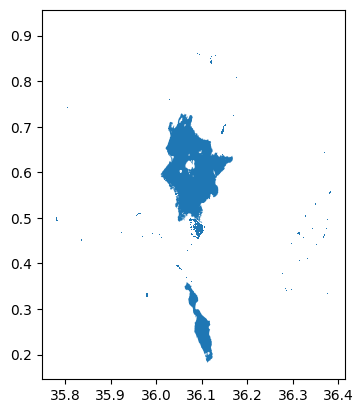

In [6]:
# Plot the waterbody polygons located within the bounding box
polygons.plot();

In [7]:
# Explore the waterbody polygons located within the bounding box
polygons.explore()

#### Geohashes
Every water body in DE Africa Water Bodies has a unique identifier (UID) called a [_geohash_](https://en.wikipedia.org/wiki/Geohash). The geohash of a water body is derived from its position, and this process can be reversed to obtain the location from the geohash. A waterbody's geohash is contained under the UID attribute and can be obtained through [DE Africa Maps](https://maps.digitalearth.africa/) by clicking on a waterbody.

**Note:** You might notice that these polygons have a range of similar geohash prefixes ('edyg' or 'edz'). If two geohashes have a similar prefix, this means that they are close together.

### Getting data for a specific water body

We can use the `.explore()` function above to interactively explore the subset of water bodies located within the bounding box. Hovering over a water body will display its attributes, including the water body's geohash (UID). After noting the geohash from the `.explore()` function, we can use it to extract just that water body through the `get_waterbody()` function.

By default, try the geohash `edz5cm96jh`.

In [8]:
selected_waterbody_geohash = "sb1ekyxw88"

selected_waterbody = get_waterbody(selected_waterbody_geohash)
selected_waterbody

id      area_m2      length_m         uid   wb_id  \
0  DEAfrica_Waterbodies.648474  226539900.0  30189.373521  sb1ekyxw88  647745   

   perim_m                                           geometry  
0   269400  MULTIPOLYGON (((36.05549 0.72925, 36.05611 0.7...

#### Plot the selected water body

In [9]:
selected_waterbody.plot();

#### Get the wet surface area time series for the selected waterbody

For any given geohash or a polygon, we can also use the `get_time_series()` function to get various measures of the water body surface over time. See the [Waterbodies Historical Extent documentation](https://docs.digitalearthafrica.org/en/latest/data_specs/Waterbodies_specs.html#Waterbodies-Surface-Area-Change) for descriptions of the different surface measures.

The function also calculates a rolling median of the water body surface wet percentage.
This is used to visualise the overall trend in the surface wet percentage.
The rolling median uses the last three observations to determine the median at a given date.

In [10]:
# Get time series for the selected water body
selected_waterbody_timeseries = get_time_series(waterbody=selected_waterbody)

selected_waterbody_timeseries.head()

area_wet_m2  percent_wet  area_dry_m2  percent_dry  \
date                                                             
1984-05-30  142439400.0        62.88   79190100.0        34.96   
1984-06-15  147272400.0        65.01   79223400.0        34.97   
1984-07-01  147078900.0        64.92   79350300.0        35.03   
1984-07-17  147500100.0        65.11   78994800.0        34.87   
1984-12-08  132145200.0        58.33   83509200.0        36.86   

            area_invalid_m2  percent_invalid  area_observed_m2  \
date                                                             
1984-05-30        4910400.0             2.17       226539900.0   
1984-06-15          44100.0             0.02       226539900.0   
1984-07-01         110700.0             0.05       226539900.0   
1984-07-17          45000.0             0.02       226539900.0   
1984-12-08       10885500.0             4.81       226539900.0   

            percent_observed  percent_wet_rolling_median  
date                                                      
1984-05-30             100.0                         NaN  
1984-06-15             100.0                         NaN  
1984-07-01             100.0                       64.92  
1984-07-17             100.0                       65.01  
1984-12-08             100.0                       64.92

#### Display the wet surface area time series for the selected waterbody

After loading the water body time series, we can use the `display_time_series()` function to create an interactive visualisation of the time series.

The visualisation shows the invalid percentage and the wet percentage. 
The invalid percentage indicates the proportion of the water body that couldn't be clearly observed. 
To provide the most representative measurements of water body surface area, the time series only contains values where the invalid percentage is lower than 10%. 

There are some caveats to be aware of:

* To appear in the time series, an observation must record clear observations of at least 90% of the water body's surface area. If 10% or more of the surface area is covered by cloud or cloud shadow, the observation will be excluded. This can cause large gaps in the time series. 
* If the invalid percentage is high, it's likely that the wet percentage is an underestimate of the true wet surface area.
* Annual and seasonal trends should only be inferred during times with sufficient observations. You should take care when infering the surface water change across time when there are few observations.
* The time series is based on the Water Observations from Space product, which has known limitations. See the [DE Africa Waterbodies service documentation](https://docs.digitalearthafrica.org/en/latest/data_specs/Waterbodies_specs.html) for more information. 

In [11]:
display_time_series(selected_waterbody_timeseries)

In [12]:
lat_range = (selected_waterbody.total_bounds[1], selected_waterbody.total_bounds[3])
lon_range = (selected_waterbody.total_bounds[0], selected_waterbody.total_bounds[2])

ds = dc.load(product=["gm_ls5_ls7_annual", "gm_ls8_annual","gm_ls8_ls9_annual"],
             measurements=['red', 'green', 'blue'],
             x=lon_range,
             y=lat_range,
             resolution = (-30,30),
             dask_chunks={'time': 1, 'x': 3000, 'y': 3000},
             time= ('2008-01-01', '2022-12-31')
             ).compute()

In [13]:
query = {
    'x': lon_range,
    'y': lat_range,
    'time': ('2008-01-01', '2022-12-31'),
    'resolution': (-30, 30)
}

wofs= dc.load(product = 'wofs_ls_summary_annual',
               output_crs = 'epsg:6933',
               **query)

In [14]:
mask = xr_rasterize(selected_waterbody, wofs)
clipped_wofs = wofs.where(mask)

clipped_wofs.frequency.isel(time=8).plot()

In [15]:
tsw = selected_waterbody_timeseries.percent_wet.loc['2008-01-01':'2022-12-31'].resample('1YE').mean().interpolate()

tsw

date
2008-12-31    57.010000
2009-12-31    58.107500
2010-12-31    58.945000
2011-12-31    61.466250
2012-12-31    70.880000
2013-12-31    77.166000
2014-12-31    82.610000
2015-12-31    82.553125
2016-12-31    82.785882
2017-12-31    80.502353
2018-12-31    83.196000
2019-12-31    83.286923
2020-12-31    90.783636
2021-12-31    95.685000
2022-12-31    96.086667
Freq: YE-DEC, Name: percent_wet, dtype: float64

In [17]:
print(len(ds.time))
print(len(clipped_wofs.time))
print(len(tsw))

15
15
15


In [20]:
# create a figure and axes
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(122)   
ax2 = plt.subplot(121)

ax1.set_title("Waterbodies Timeseries")
ax1.set_xlabel("Date")
ax1.set_ylabel("Surface water extent (%)")
years = mdates.YearLocator(2) 
ax1.xaxis.set_major_locator(years)
ax1.tick_params(axis='x', labelrotation = 45)

bands=['red', 'green', 'blue']

cax = (ds[bands].isel(time=0).to_array().transpose('y','x','variable').squeeze(
    ).clip(0,3000)/np.max(
    ds[bands].isel(time=0).to_array(
    ).transpose('y','x','variable').squeeze().clip(0,3000))).plot.imshow(rgb='variable', animated = True, robust=True, ax=ax2)
dax = clipped_wofs.frequency[0,:,:].plot(cmap='Blues', ax=ax2)
selected_waterbody.plot(ax=ax2, edgecolor='black', color='none')

def update(num, x, y, line):
    dax.set_array(clipped_wofs.frequency[num,:,:])
    cax.set_array((ds[bands].isel(time=num).to_array().transpose('y','x','variable')).squeeze().clip(0,3000)/np.max(
        ds[bands].isel(time=num).to_array().transpose('y','x','variable')).squeeze().clip(0,3000))
    ax2.set_title("Time = " + str(clipped_wofs.frequency.coords['time'].values[(num)])[:12])
    line.set_data(x[:num], y[:num])
    return line,

x = tsw.index
y = tsw.values

line, = ax1.plot(x, y)

plt.tight_layout()

ani = animation.FuncAnimation(fig, update, len(ds.time), fargs=[x, y, line],
                              interval=800, blit=True)
ani.save('LakeBaringo_Kenya_ts.gif')

plt.close()
HTML(ani.to_html5_video())

# Surface water extent and rainfall

In [21]:
# Set the central latitude and longitude
lat = -2.31
lon = 36.01

# Set the buffer to load around the central coordinates
buffer = 0.3

# Compute the bounding box coordinates
xlim = (lon-buffer, lon+buffer)
ylim =  (lat+buffer, lat-buffer)

# Preview area on a map
display_map(xlim, ylim)

In [22]:
# Create a bounding box from study area coordinates
bbox = (xlim[0], ylim[1], xlim[1], ylim[0])

# Select all water bodies located within the bounding box
polygons = get_waterbodies(bbox, crs="EPSG:4326")

# Return GeoDataFrame with selected water bodies
polygons.head()

id      area_m2      length_m         uid   wb_id  \
0  DEAfrica_Waterbodies.396406      10800.0    150.000030  kz96kbc61s  396379   
1  DEAfrica_Waterbodies.396408       8100.0    119.999969  kz97n84d6r  396381   
2  DEAfrica_Waterbodies.396415      12600.0    180.000000  kz991pfh6d  396387   
3  DEAfrica_Waterbodies.396416      18000.0    300.000000  kz991qru9p  396388   
4  DEAfrica_Waterbodies.396423  907920900.0  66106.020312  kz9de3xqry  396395   

   perim_m                                           geometry  
0      480  MULTIPOLYGON (((35.71782 -2.41201, 35.71876 -2...  
1      420  MULTIPOLYGON (((35.79680 -2.28422, 35.79711 -2...  
2      720  MULTIPOLYGON (((35.90531 -2.59302, 35.90593 -2...  
3      900  MULTIPOLYGON (((35.92459 -2.60055, 35.92490 -2...  
4   388500  MULTIPOLYGON (((36.00885 -2.09266, 36.00916 -2...

In [23]:
# Explore the waterbody polygons located within the bounding box
polygons.explore()

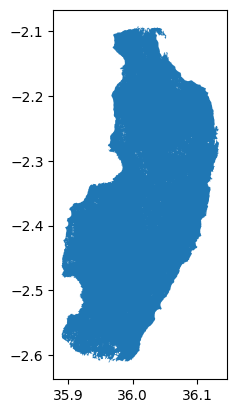

In [25]:
selected_waterbody_geohash = "kz9de3xqry"

selected_waterbody = get_waterbody(selected_waterbody_geohash)
selected_waterbody.plot();

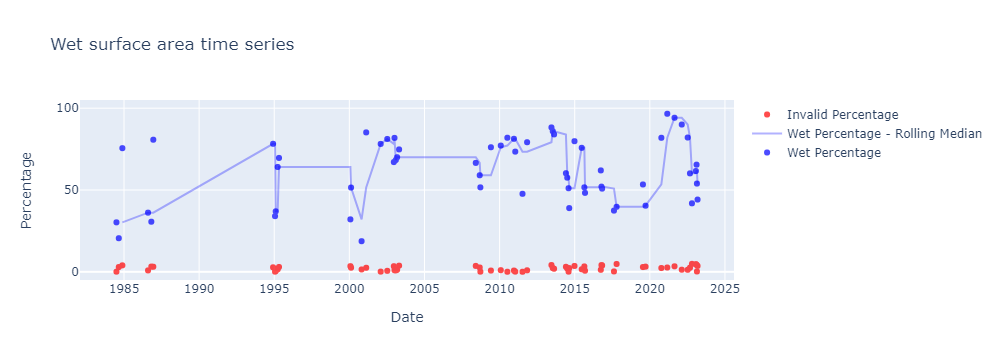

In [26]:
# Get time series for the selected water body
selected_waterbody_timeseries = get_time_series(waterbody=selected_waterbody)

display_time_series(selected_waterbody_timeseries)

In [37]:
lat_range = (selected_waterbody.total_bounds[1], selected_waterbody.total_bounds[3])
lon_range = (selected_waterbody.total_bounds[0], selected_waterbody.total_bounds[2])

ds = dc.load(product=["gm_s2_rolling"],
             measurements=['red', 'green', 'blue'],
             x=lon_range,
             y=lat_range,
             resolution = (-30,30),
             dask_chunks={'time': 1, 'x': 3000, 'y': 3000},
             time= ('2019-02-01', '2023-11-30')
             ).compute()

ds

<xarray.Dataset>
Dimensions:      (time: 56, y: 2204, x: 783)
Coordinates:
  * time         (time) datetime64[ns] 2019-02-14T23:59:59.999999 ... 2023-10...
  * y            (y) float64 -2.669e+05 -2.669e+05 ... -3.33e+05 -3.33e+05
  * x            (x) float64 3.463e+06 3.463e+06 ... 3.486e+06 3.486e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 694 620 689 792 797 ... 913 1172 1137 1680
    green        (time, y, x) uint16 696 640 696 721 735 ... 775 943 930 1318
    blue         (time, y, x) uint16 453 408 437 476 484 ... 577 530 653 685 941
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

In [38]:
ds_rf = dc.load(product='rainfall_chirps_monthly',
             measurements=['rainfall'],
             x=lon_range,
             y=lat_range,
             time= ('2019-01-01', '2023-12-31'))
ds_rf

<xarray.Dataset>
Dimensions:      (time: 58, latitude: 12, longitude: 6)
Coordinates:
  * time         (time) datetime64[ns] 2019-01-16T11:59:59.500000 ... 2023-11...
  * latitude     (latitude) float64 -2.075 -2.125 -2.175 ... -2.575 -2.625
  * longitude    (longitude) float64 35.88 35.93 35.98 36.03 36.08 36.13
    spatial_ref  int32 4326
Data variables:
    rainfall     (time, latitude, longitude) float32 21.32 21.7 ... 261.9 268.7
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

In [39]:
ds_rf_month = ds_rf.mean(['longitude', 'latitude']).to_dataframe().drop(['spatial_ref'], axis=1)

In [46]:
tsw = selected_waterbody_timeseries.percent_wet.loc['2018-01-15':'2023-12-16'].resample('1ME').mean().interpolate()

In [41]:
fig, ax1 = plt.subplots(figsize=(16,6))

ax2 = ax1.twinx()
ax2.invert_yaxis()
ax2.bar(ds_rf_month.index, 
       ds_rf_month.rainfall, width =15, align='center',
       color='b')
ax2.set_ylabel('Rainfall (mm)')

ax1.plot(tsw, color='k')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax1.set_ylabel('Surface water extent (%)')

plt.title('Lake Natron');

In [45]:
# create a figure and axes
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(122)
ax2 = plt.subplot(121)

ax1.set_title("Monthly rainfall and water extent")
ax1.set_xlabel("Date")
ax1.set_ylabel("Total Precipitation (mm)")

bands=['red', 'green', 'blue']


cax = (ds[bands].isel(time=0).to_array().transpose('y','x','variable').squeeze()/np.max(
    ds[bands].isel(time=0).to_array(
    ).transpose('y','x','variable').squeeze())).plot.imshow(rgb='variable', animated = True, robust=True)

ax3 = ax1.twinx()
bars = ax3.bar(ds_rf_month.index, 
       ds_rf_month.rainfall * [0], width =15, align='center',
       color='b')
ax3.set_ylabel('Rainfall (mm)')
ax3.set_ylim(0, np.max(ds_rf_month.rainfall)+20)
ax3.invert_yaxis()

x=tsw.index
y=tsw.values

line, = ax1.plot(x,y, color='k')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_ylabel('Surface water extent (%)')

def update(num, x, y, bars, line):
    cax.set_array((ds[bands].isel(time=num).to_array().transpose('y','x','variable').squeeze().clip(0,2500)/np.max(
        ds[bands].isel(time=num).to_array().transpose('y','x','variable').squeeze().clip(0,2500))))
    ax2.set_title("Time = " + str(ds[bands].coords['time'].values[(num)])[:12])
    bars[num].set_height(ds_rf_month.rainfall.iloc[num])
    line.set_data(x[:num], y[:num])
    return line,

plt.tight_layout()

ani = animation.FuncAnimation(fig, update, len(x)-1, fargs=[x, y, bars, line],
                              interval=300, blit=True)
#ani.save('LakeNatron.gif')

plt.close()
HTML(ani.to_html5_video())

## Conclusion

This notebook has demonstrated two animations for visualising waterbodies over different periods. The techniques and code shown here can be adapted to user defined purposes.

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to repoart an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [ ]:
import datacube
print(datacube.__version__)

**Last Tested:**

In [ ]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')